In [1]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.animation as animation
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt 

%matplotlib inline
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True)

# PART A - 15 Marks

## Q1. Please refer the table below to answer below questions: [2 Marks]


| Planned to purchase Product A | Actually placed order for Product A - Yes | Actually placed order for Product A - No | Total | 
| :------------------: | :-----------------------: | :-----------------------: | :-------------: |
|          Yes         |           400             |           100             |       500       |
|          No          |           200             |          1300             |      1500       |
|          Total       |           600             |          1400             |      2000       |


#### Q 1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order. [1 Mark]

In [2]:
#From above table, no of people who planned to purchase and actually placed an order = 400
#Let this no be PP
PP = 400

#Total no of people = 2000
total = 2000

#Joint Probability of  the people who planned to purchase and actually placed an order 
joint_prob = PP / total

print('Joint probability of the people who planned to purchase and actually placed an order is %1.4f' % joint_prob)


Joint probability of the people who planned to purchase and actually placed an order is 0.2000


#### Q 1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase. [1 Mark]

In [3]:
# p1 = P(planned to purchase and actually placed an order | Planned to purchase)
# p1 = P(planned to purchase and actually placed an order and Planned to purchase) / P(Planned to purchase)

#Now,
# p2 = P(planned to purchase and actually placed an order and Planned to purchase)
# p2 = no of people planned to purchaesed and actually placed an order / total people = 400 / 2000
p2 = 400 / 2000

#And,
# P3 = P(Planned to purchase) = no of people planned to purchaesed  / total people = 500 / 2000
p3 = 500 / 2000

#p1 = p2 / p3

p1   = p2 / p3

print('Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchaseis %1.4f' % p1)

Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchaseis 0.8000


## Q2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions. [4 Marks]

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789062e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


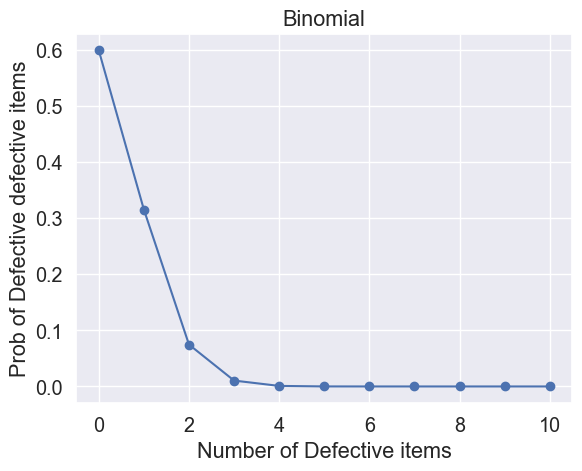

In [4]:
p   =  0.05 # failure rate of products that the company manufactures is 5%
n   =  10 # sample size
k   =  np.arange(0,11) # An array of quantiles

binomial = stats.binom.pmf(k,n,p)
print(binomial)

plt.plot(k,binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of Defective items')
plt.ylabel('Prob of Defective defective items')
plt.show()



#### Q 2.A. Probability that none of the items are defective? [1 Mark]

In [5]:
#This is the probabilty of zero items are defective
print('Probability of none of the items are defective is %1.4f' % binomial[0])

Probability of none of the items are defective is 0.5987


#### Q 2.B. Probability that exactly one of the items is defective? [1 Mark]

In [6]:
print('Probability that exactly one of the items is defective : %1.4f' % binomial[1])

Probability that exactly one of the items is defective : 0.3151


#### Q 2.C. Probability that two or fewer of the items are defective? [1 Mark]

In [7]:
cumbinomial = stats.binom.cdf(k,n,p)
cumbinomial[2]

#this is sumof PMF for 0,1 and 2
print('Probability that two or fewer of the items is defective : %1.4f' % (binomial[0] + binomial[1] + binomial[2]))

#Alternatively this can be calculated in one got with Cumalitive density function for point 2
cumbinomial = stats.binom.cdf(k,n,p)
print('(Alternative Calculation) Probability that two or fewer of the items is defective : %1.4f' % cumbinomial[2])


Probability that two or fewer of the items is defective : 0.9885
(Alternative Calculation) Probability that two or fewer of the items is defective : 0.9885


#### Q 2.D. Probability that three or more of the items are defective ? [1 Mark]

In [8]:
#This is the complementary of question 2c, so value is 1 minus cumalitive prop. density at point 2
print('Probability that three or more of the items are defective is %1.4f' % (1-cumbinomial[2]))

Probability that three or more of the items are defective is 0.0115


## Q3. A car salesman sells on an average 3 cars per week. [3 Marks]

In [9]:
rate =  3 # sells 3 cars per week
n    =  np.arange(0,16)

cumpoisson = stats.poisson.cdf(n,rate)
cumpoisson

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
       0.99970766, 0.99992861, 0.99998385, 0.9999966 , 0.99999933,
       0.99999988])

#### Q 3.A. What is Probability that in a given week he will sell some cars? [1 Mark]

In [10]:
# P = probability that the salesman sells some cars, so this is the area at right side of point 0 
P   = 1 - cumpoisson[0]
print('Probability that the saleman sells some cars is %1.4f' % P)

Probability that the saleman sells some cars is 0.9502


#### Q 3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? [1 Mark]

In [11]:
# Let P1 be the probability that the salesman sells more than 4 cars
P1 = cumpoisson[4] # P(X >=4)
# Let P2 be the probability that the salesman sells more than 1 cars
P2 = cumpoisson[1] # P(X >=1)
P = P1 - P2 # Prob. that the salesman will sell between 2 and 5 cars
print('Probability that the salesman sells 2 or more but less than 5 cars is %1.4f' % P)

Probability that the salesman sells 2 or more but less than 5 cars is 0.6161


#### Q 3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. [1 Mark]

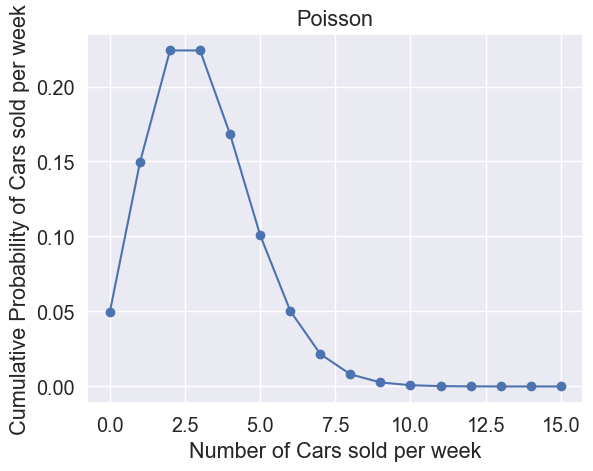

In [12]:
poisson = stats.poisson.pmf(n,rate)

plt.plot(n,poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of Cars sold per week')
plt.ylabel('Cumulative Probability of Cars sold per week')
plt.show()

## Q4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions. [3 Marks]

In [13]:
#There are three orders and the probability of a correct order is 0.868.
n=3 #Sample size
p=0.868 #Propbability of recocnizing product correctly

#### Q 4.A. What is the probability that all three orders will be recognised correctly? [1 Mark]

In [14]:
#Using Binomial distribution equation, propbabilty that all 3 orders correctly recognized is
#calculated as probabilty mass function for point 3
prob = stats.binom.pmf(3, n, p)   
print('The probability that all the three orders are recongnized correctly is %1.4f' % prob)

The probability that all the three orders are recongnized correctly is 0.6540


#### Q 4.B. What is the probability that none of the three orders will be recognised correctly? [1 Mark]

In [15]:
 #Likewise, for none of the order recocnize correctly, is PMF at point 0
prob = stats.binom.pmf(0, n, p)    

print('The probability that none of the three orders will be recognised correctly is %1.4f' % prob)

The probability that none of the three orders will be recognised correctly is 0.0023


#### Q 4.C. What is the probability that at least two of the three orders will be recognised correctly? [1 Mark]

In [16]:
#And, for at least 2 out of 3 orders recocnize correctly, is PMF of point 2 and point 3
prob = stats.binom.pmf(3, n, p) + stats.binom.pmf(2, n, p)

print('The probability that at least two of the three orders will be recognised correctly is %1.4f' % prob)

The probability that at least two of the three orders will be recognised correctly is 0.9523


## Q5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of Applied Statistics to get data driven business solution. [3 Marks] 

Insurance companies uses probabilities to arrive at premimum rate. So, they collect the data to calculate the risk of the event for which they wre providing the insurance assurances (e.g. Life = probability of deatch at certain age, Car - probability in getting into accidents). Based on that they fix the premium rate so that they have enough pool of money to settle the claim when the event actually occurs. 

# PART B - 30 Marks

* **DOMAIN:** Sports  

* **CONTEXT:** Company X manages the men's top professional basketball division of the American league system. The dataset                    contains information on all the teams that have participated in all the past tournaments. It has data about how                many baskets each team scored, conceded, how many times they came within the first 2 positions, how many                        tournaments they have qualified, their best position in the past, etc.

* **DATA DESCRIPTION:** Basketball.csv - The data set contains information on all the teams so far participated in all the past                         tournaments.

* **DATA DICTIONARY:**
     1. **Team**: Team’s name
     2. **Tournament**: Number of played tournaments.
     3. **Score**: Team’s score so far.
     4. **PlayedGames**: Games played by the team so far.
     5. **WonGames**: Games won by the team so far.
     6. **DrawnGames**: Games drawn by the team so far.
     7. **LostGames**: Games lost by the team so far.
     8. **BasketScored**: Basket scored by the team so far.
     9. **BasketGiven**: Basket scored against the team so far.
     10. **TournamentChampion**: How many times the team was a champion of the tournaments so far.
     11. **Runner-up**: How many times the team was a runners-up of the tournaments so far.
     12. **TeamLaunch**: Year the team was launched on professional basketball.
     13. **HighestPositionHeld**: Highest position held by the team amongst all the tournaments played.
  
* **PROJECT OBJECTIVE:** Company’s management wants to invest on proposals on managing some of the best teams in the league.                            The analytics department has been assigned with a task of creating a report on the performance shown                            by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants                          to understand which teams they can approach which will be a deal win for them.

* **STEPS AND TASK [30 Marks]:**
   1. Read the data set, clean the data and prepare final dataset to be used for analysis. [10 Marks]
   2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data         driven insights on recommending which teams they can approach which will be a deal win for them. Also as a data and             statistics expert you have to develop a detailed performance report using this data. [10 Marks]
       <p style="color:#D3D3D3"> Hint: Use statistical techniques and visualisation techniques to come up with useful metrics and reporting.Find out the best performing team, oldest team, team with highest goals, team with lowest performance etc.        and many more. These are just random examples. Please use your best analytical approach to build this                           report. You can mix match columns to create new ones which can be used for better analysis. Create your own                     features if required. Be highly experimental and analytical here to find hidden patterns. Use graphical                         interactive libraries to enable you to publish interactive plots in python </p>
   3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,          veracity etc. on the data points collected by the association to perform a better data analysis in future. At-least 1          suggestion for each point. [10 Marks]

### Load the Dataset

In [17]:
#1. Read the data

#Load CSV
basketball = pd.read_csv('DS-Part2-Basketball.csv')


### Inspect the Dataset

In [18]:
# Check the head of the dataset
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [19]:
# Check the tail of the dataset
basketball.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [20]:
#Check some stats
basketball.describe(include="all")

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61,61,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8,10,47,NaN
top,Team 1,NaN,4385,2762,7,14,37,70,3140,-,-,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52,48,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


**Comments**: with pandas **“.head()”** function  and **“.tail()”** function we can observe top 5 and bottom 5 rows. It is observed that some data point have '-' instead of numbers.

In [21]:
# Get the shape and size of the dataset
basketball.shape

(61, 13)

**Comments**: there are 61 rows and 13 columns in the data set.

In [22]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


**Observations**
- Tehere are **61** observations and **13** attribues
- Except _Team_ and _TeamLaunch_ attributes, all values should be in integer, but except _Tournament_, other attributes are showing _string_ type
- There are **No null/missing values** in the data
- But, presence of '-' in integer column suggests, these are actually missing value.


### Data Cleaning
First, let's try to replace '-' values with 0(_zero_).

In [23]:
# Replacae all '-' with 0
basketball.replace(to_replace='-', value=0, inplace=True)

The _TeamLaunch_ columns have values like 2009-10, 2010~11. Let's change this to first year value first.

In [24]:
# Correction for TeamLaunch column : take only first 4 digits of the TeamLaunch
basketball['TeamLaunch'] = basketball['TeamLaunch'].apply(lambda year: str(year)[:4])

#let's view the new column values
basketball['TeamLaunch']

0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: TeamLaunch, Length: 61, dtype: object

In [25]:
# Convert the datatype of all columns to integer except for TeamName
columns = basketball.columns
basketball[columns[1:]] = basketball[columns[1:]].astype('int64')
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [26]:
# Describe the dataset with various summary and statistics
basketball.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,61.0,24.000000,26.827225,1.0,4.0,12.0,38.0,86.0
Score,61.0,901.426230,1134.899121,0.0,96.0,375.0,1351.0,4385.0
PlayedGames,61.0,796.819672,876.282765,0.0,114.0,423.0,1318.0,2762.0
WonGames,61.0,303.967213,406.991030,0.0,34.0,123.0,426.0,1647.0
DrawnGames,61.0,188.934426,201.799477,0.0,24.0,95.0,330.0,633.0
LostGames,61.0,303.754098,294.708594,0.0,62.0,197.0,563.0,1070.0
BasketScored,61.0,1140.344262,1506.740211,0.0,153.0,430.0,1642.0,5947.0
BasketGiven,61.0,1140.229508,1163.710766,0.0,221.0,632.0,1951.0,3889.0
TournamentChampion,61.0,1.426230,5.472535,0.0,0.0,0.0,0.0,33.0
Runner-up,61.0,1.409836,4.540107,0.0,0.0,0.0,0.0,25.0


**Observations**
>- 9 attributes have a minimum value of 0 present in the Central Tendency chart, hence the distributions contains one or more zero values.


### Feature Engineering - Add More features
Let's try to derive some features from some of the existing dataset.

**Is there cancelled games in any tournaments?**
This can be easily calculated, by subtracting win/lost/drawn games from the total games.

In [27]:
cancelled = basketball['PlayedGames'] - (basketball['DrawnGames'] + basketball['WonGames'] + basketball['LostGames'])

#Is there any rows with value more than 0?
cancelled[cancelled>0]

22    10
dtype: int64

_So , 22nd row has 10 cancelled games for some team. Let's add this feature.

In [28]:
basketball.insert(loc=7, column='CancelledGames', value=cancelled)

#Let's see the rows, where there are some cancelled games
basketball[basketball['CancelledGames'] > 0]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
22,Team 23,17,662,652,189,148,305,10,760,1088,0,0,1977,8


**What is the winning ration of each team?**

This feature will give us an idea about the best team, better the winning ration, better the team is.

In [29]:
# Let's add WinningRatio feature
# WinningRatio = Games Won / Games Played
won_ratio = basketball['WonGames'] / basketball['PlayedGames']
basketball.insert(loc=5, column='WinningRatio', value=won_ratio)

#Let's see first 5 rows
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningRatio,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0,4631,3700,8,7,1929,1


**What about lossing ratio?**

At first glance, it looks like loosing ration is opposite of winning ratio. But, in view of drawn/cancelled games, this may give us a better understanding of team's true potential.

In [30]:
# Add LoosingRatio features

lost_ratio = basketball['LostGames'] / basketball['PlayedGames']
basketball.insert(loc=8, column='LoosingRatio', value=lost_ratio)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningRatio,DrawnGames,LostGames,LoosingRatio,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,0,4631,3700,8,7,1929,1


**How many games a team win per lost games?**

If this value is more than 1, then the wins more games than losing. More the value, better it is.

In [31]:
# Add WinPerLoss features
win_per_loss = basketball['WonGames'] / basketball['LostGames']
basketball.insert(loc=9, column='WinPerLoss', value=win_per_loss)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningRatio,DrawnGames,LostGames,LoosingRatio,WinPerLoss,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,8,7,1929,1


**What is each team score conversion ration?**

This means, how efficiently they score a basket when a basket is given to them.

In [32]:
# Add ConversionRatio features
conv = basketball['BasketScored'] / basketball['BasketGiven']
basketball.insert(loc=13, column='ConversionRatio', value=conv)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningRatio,DrawnGames,LostGames,LoosingRatio,WinPerLoss,CancelledGames,BasketScored,BasketGiven,ConversionRatio,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,1.893949,33,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,1.894669,25,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,1.370202,10,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,1.267801,6,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,1.251622,8,7,1929,1


**How many times a team bean to fianls?**

In [33]:
# Add Fianlist feature
finalist = basketball['TournamentChampion'] + basketball['Runner-up']
basketball.insert(loc=17, column='Finalist', value=finalist)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningRatio,DrawnGames,LostGames,LoosingRatio,WinPerLoss,CancelledGames,BasketScored,BasketGiven,ConversionRatio,TournamentChampion,Runner-up,TeamLaunch,Finalist,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,1.893949,33,23,1929,56,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,1.894669,25,25,1929,50,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,1.370202,10,8,1929,18,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,1.267801,6,6,1931,12,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,1.251622,8,7,1929,15,1


In [34]:
#FianlWinRatio : how many time they won in final
finalwin = basketball['TournamentChampion'] / basketball['Finalist']
basketball.insert(loc=18, column='FianlWinRatio', value=finalwin)
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningRatio,DrawnGames,LostGames,LoosingRatio,WinPerLoss,CancelledGames,BasketScored,BasketGiven,ConversionRatio,TournamentChampion,Runner-up,TeamLaunch,Finalist,FianlWinRatio,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,1.893949,33,23,1929,56,0.589286,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,1.894669,25,25,1929,50,0.500000,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,1.370202,10,8,1929,18,0.555556,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,1.267801,6,6,1931,12,0.500000,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,1.251622,8,7,1929,15,0.533333,1


_This is our final dataset._

### Data Visualization


#### Univariate Analysis - To check individual distribution- Skewness

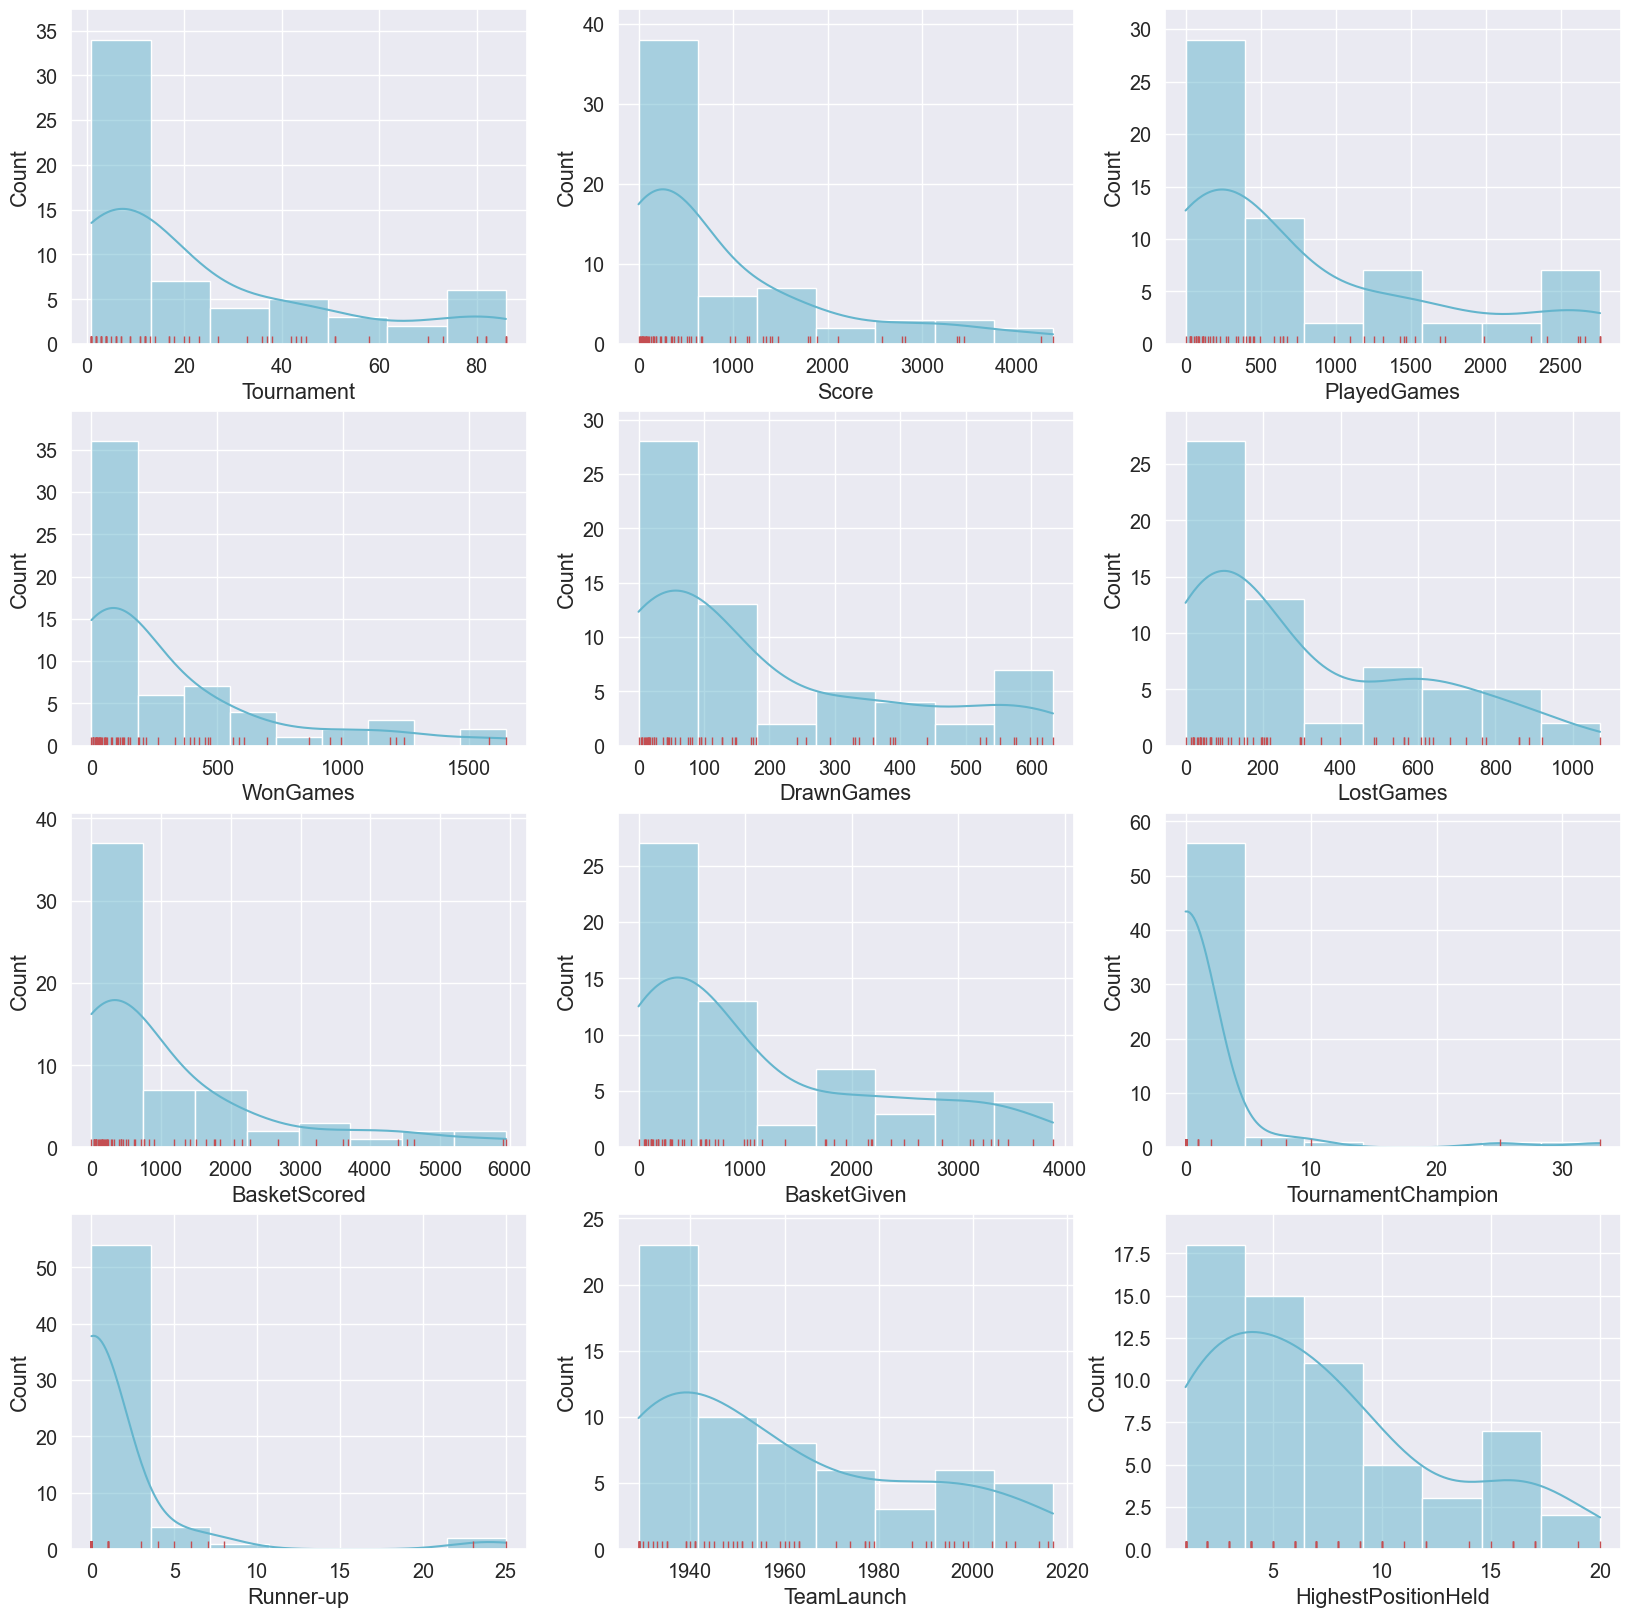

In [35]:
# Check for distribution skewness
attrs = ['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld']
plt.figure(figsize=(20,20))
index = 1
for col in basketball[attrs]:
    plt.subplot(4,3,index)
    sns.histplot(basketball[col], kde=True, color = "c")
    sns.rugplot(basketball[col],  color = "r")
    index += 1

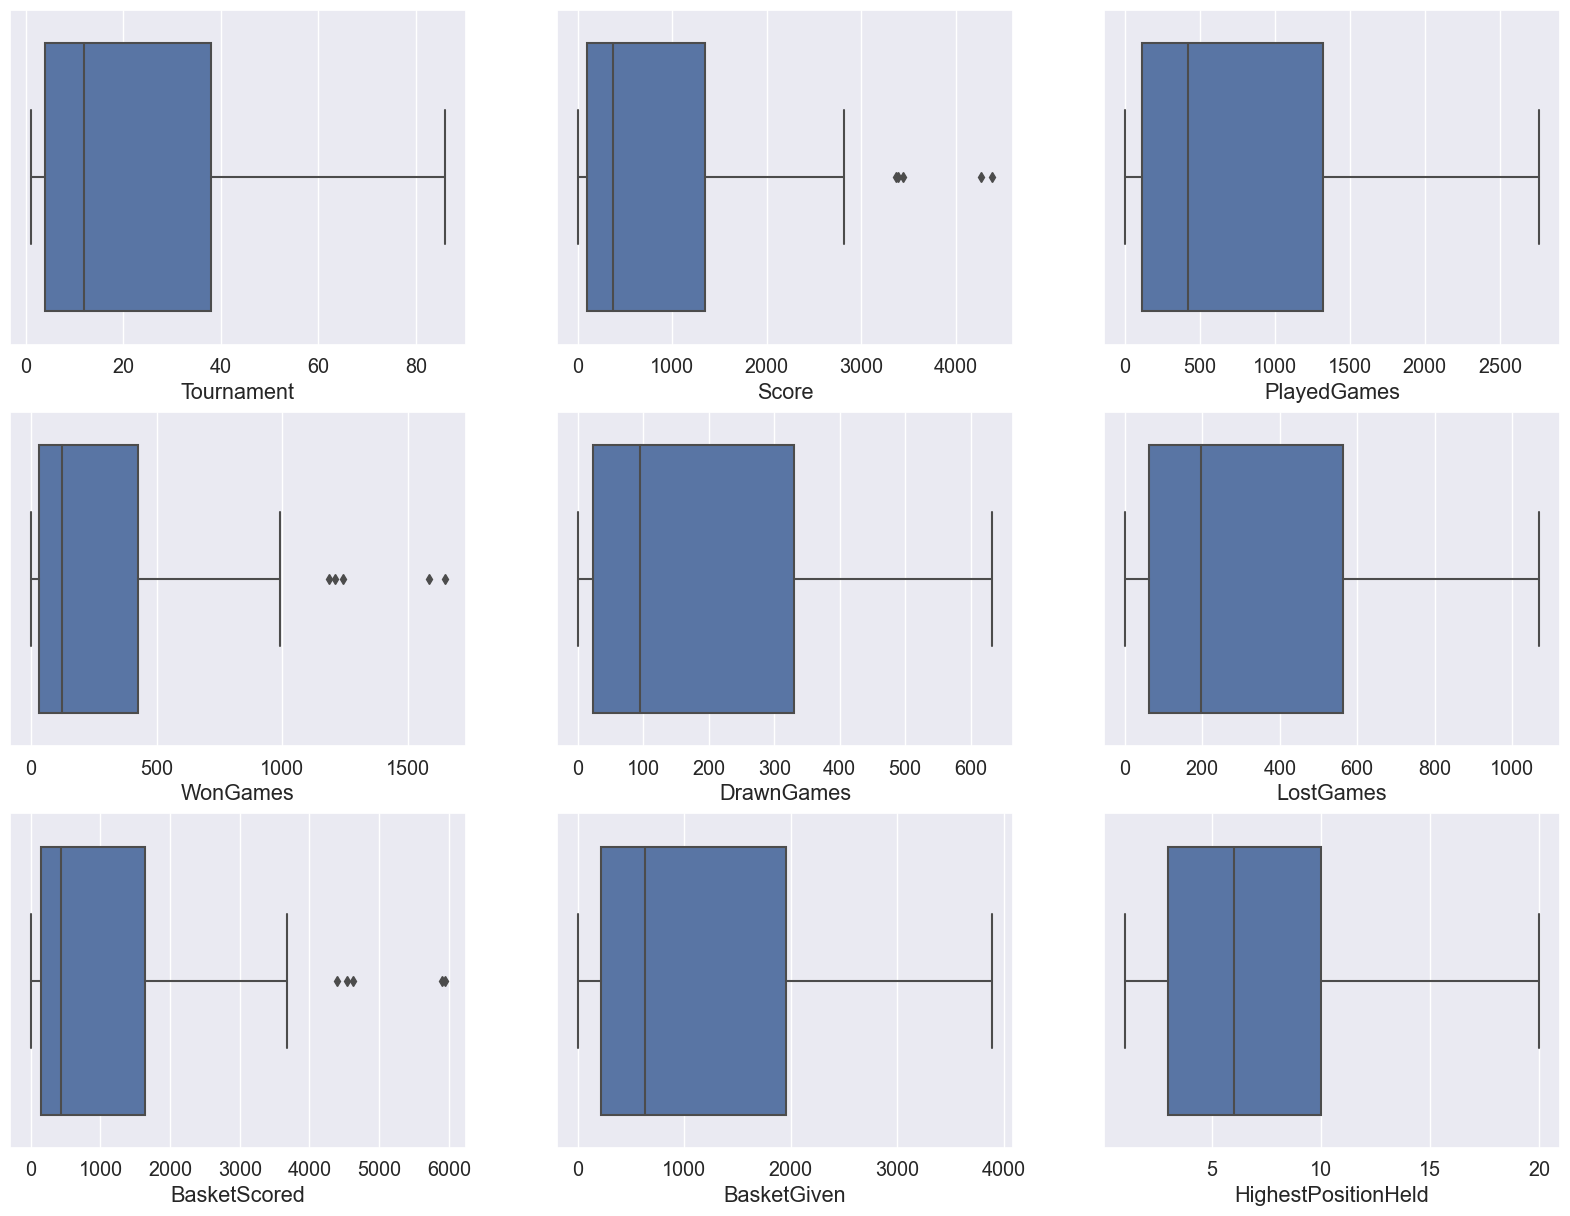

In [36]:
# Check for box plots
attrs = ['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','HighestPositionHeld']
plt.figure(figsize=(20,20))
index = 1
for col in basketball[attrs]:
    plt.subplot(4,3,index)
    sns.boxplot(x=basketball[col])
    index += 1

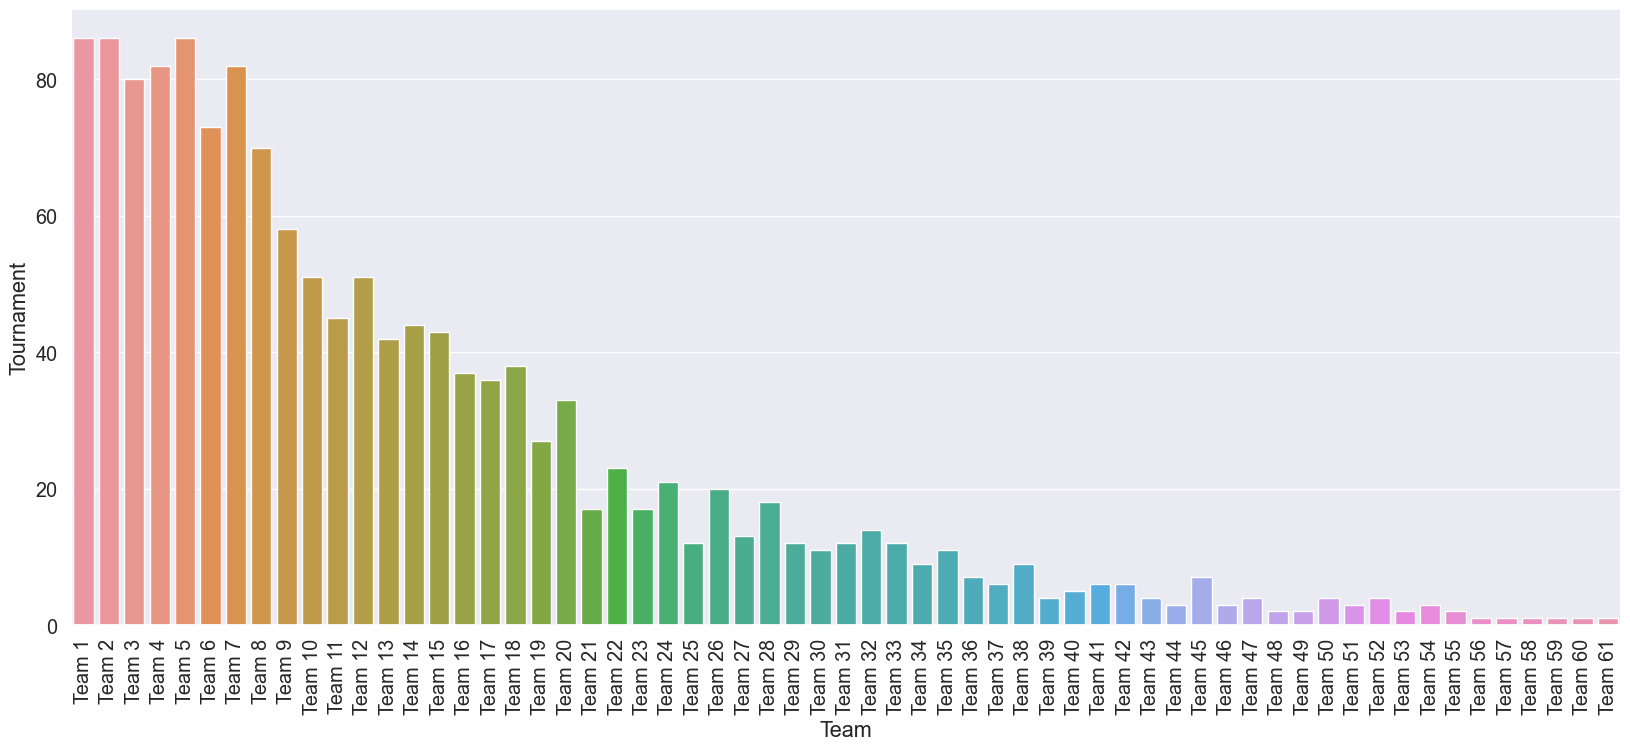

In [37]:
# No of tournaments played by teams
plt.figure(figsize=(20,8))
sns.barplot(basketball, x='Team', y='Tournament')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, '# matches lost')

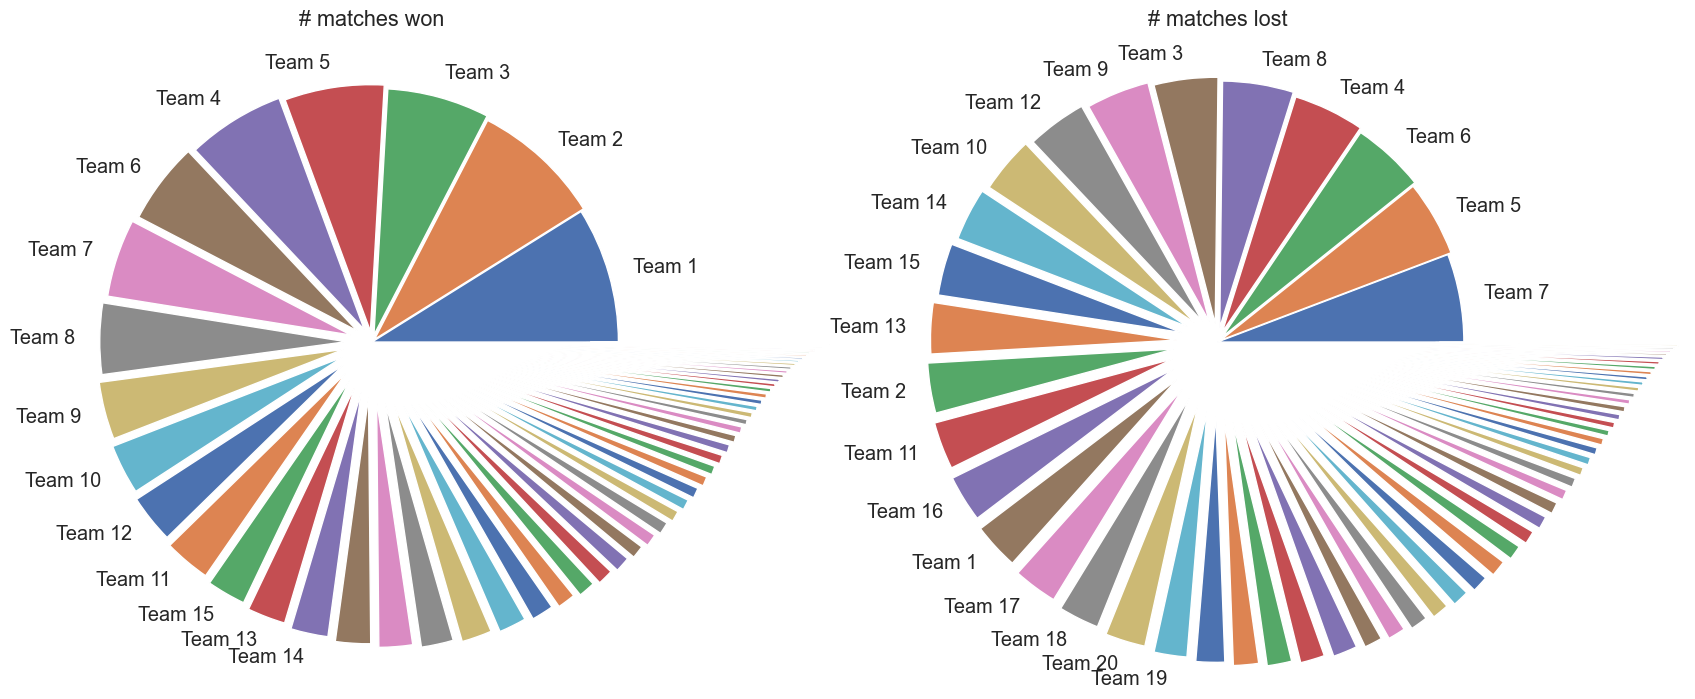

In [38]:
# No of matches won/lost by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = basketball[['Team','WonGames']].sort_values(by="WonGames", ascending=False)
plot = plt.pie(bb['WonGames'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches won')
plt.subplot(1,2,2)
bb = basketball[['Team','LostGames']].sort_values(by="LostGames", ascending=False)
plot = plt.pie(bb['LostGames'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches lost')

<Axes: xlabel='Score', ylabel='Team'>

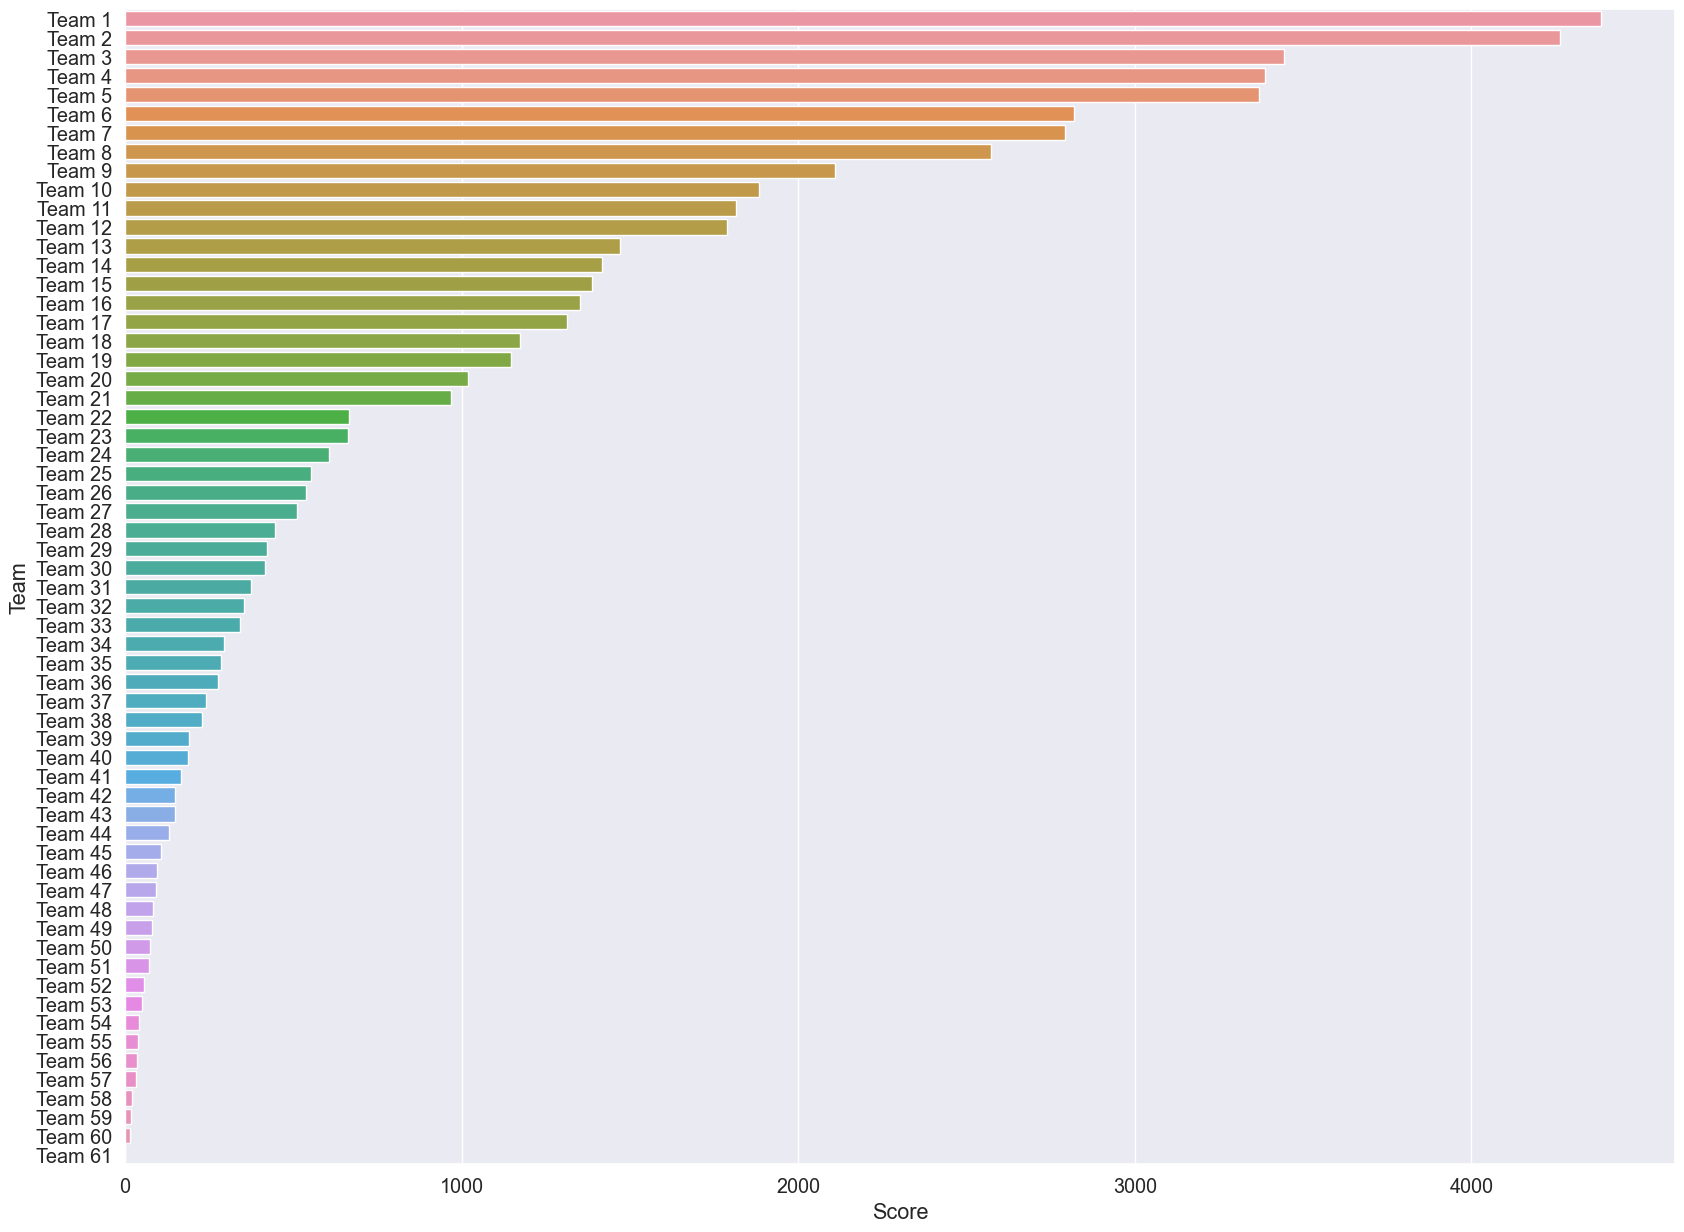

In [39]:
# Scores of the teams
plt.figure(figsize=(20,15))
sns.barplot(basketball, x='Score', y='Team', orient='h')

Text(0.5, 1.0, '# Baskets given')

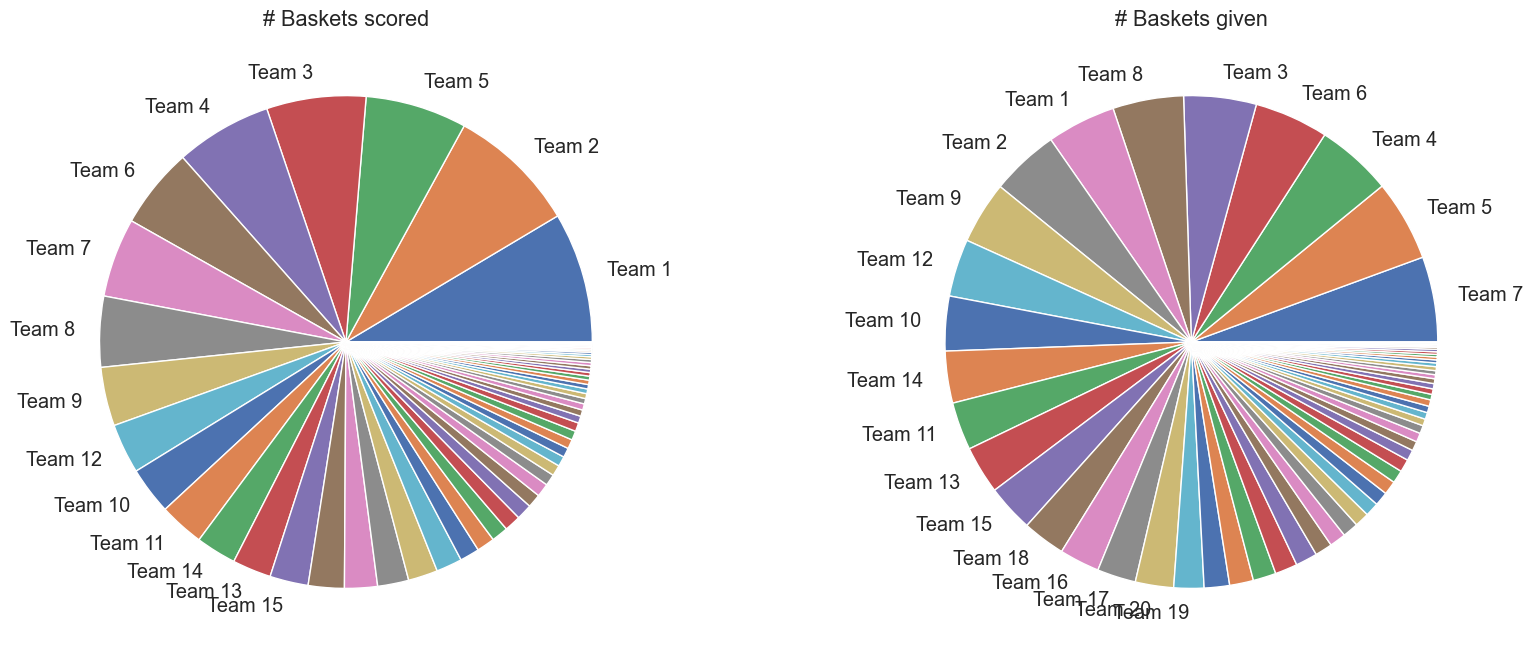

In [40]:
# No of baskets scored/given by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = basketball[['Team','BasketScored']].sort_values(by="BasketScored", ascending=False)
plot = plt.pie(bb['BasketScored'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15))
plt.title('# Baskets scored')
plt.subplot(1,2,2)
bb = basketball[['Team','BasketGiven']].sort_values(by="BasketGiven", ascending=False)
plot = plt.pie(bb['BasketGiven'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20))
plt.title('# Baskets given')

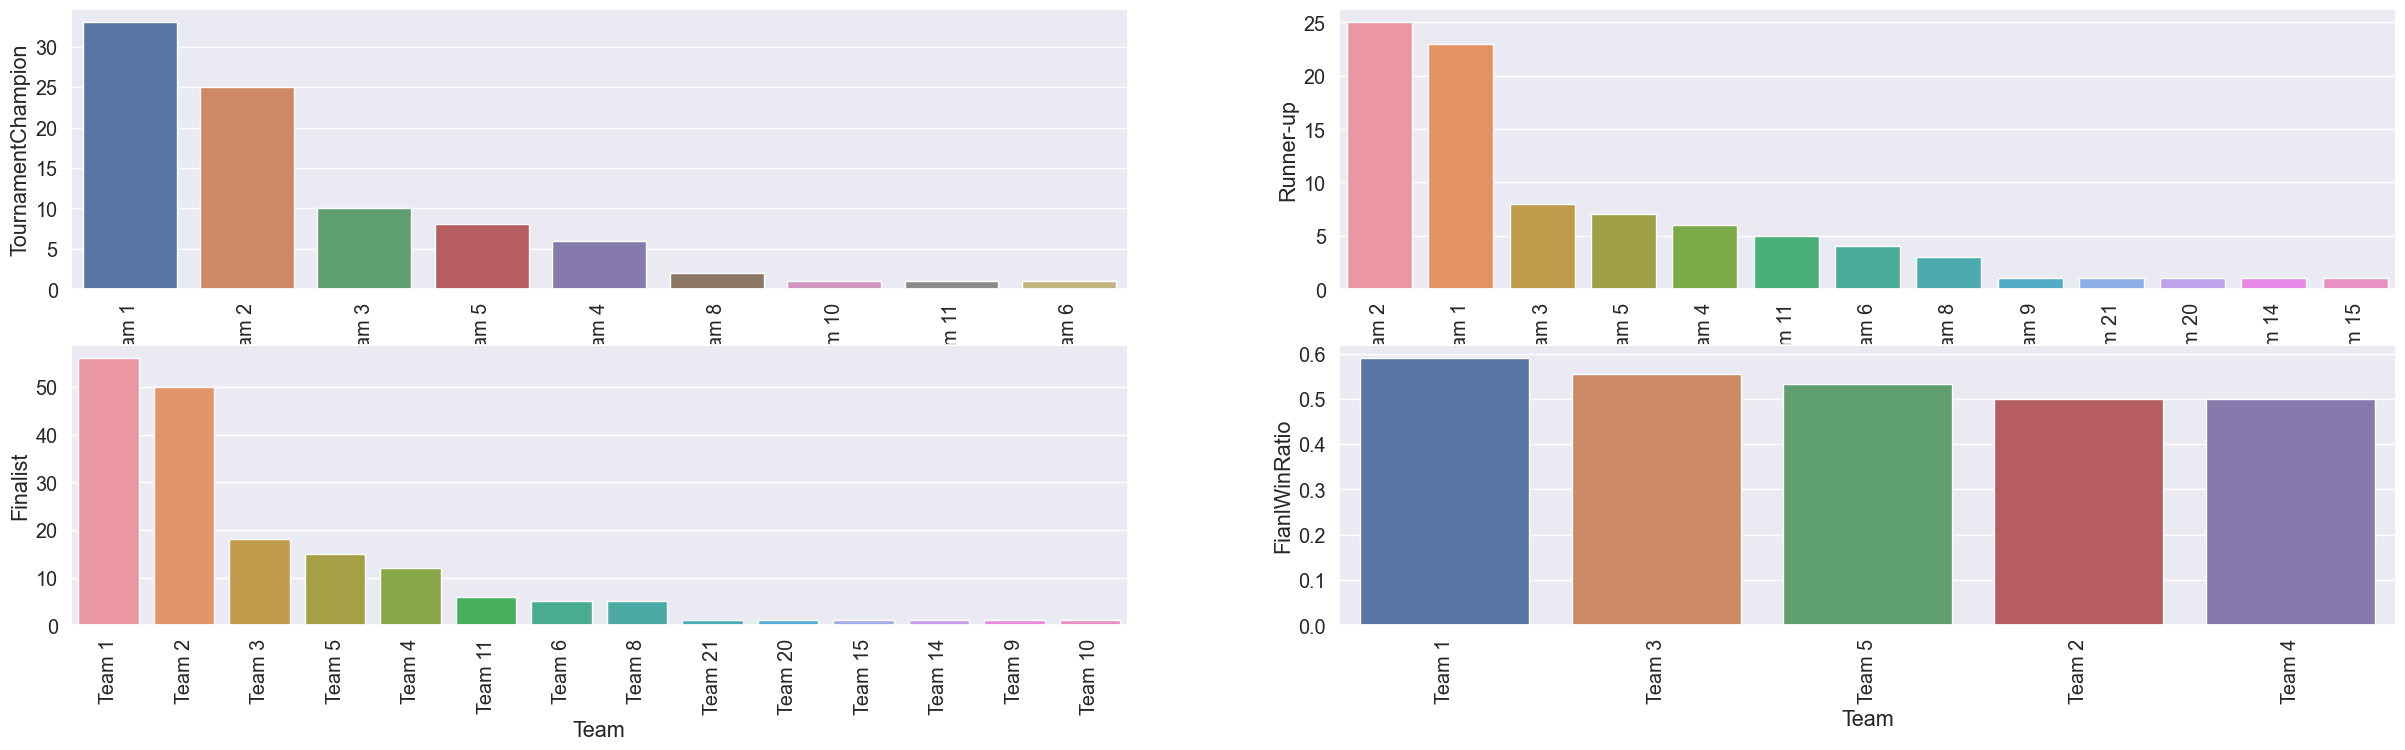

In [41]:
# The most winner/runner-up/finalists
# No of matches won/lost by teams
plt.figure(figsize=(30,8))

#Champions
plt.subplot(2,2,1)
bb = basketball[['Team','TournamentChampion']].sort_values(by="TournamentChampion", ascending=False).where(lambda x: x["TournamentChampion"] > 0)
sns.barplot(bb, x='Team', y='TournamentChampion')
plt.xticks(rotation=90)

#Runner ups
plt.subplot(2,2,2)
bb = basketball[['Team','Runner-up']].sort_values(by="Runner-up", ascending=False).where(lambda x: x["Runner-up"] > 0)
sns.barplot(bb, x='Team', y='Runner-up')
plt.xticks(rotation=90)

#Finalists
plt.subplot(2,2,3)
bb = basketball[['Team','Finalist']].sort_values(by="Finalist", ascending=False).where(lambda x: x["Finalist"] > 0)
sns.barplot(bb, x='Team', y='Finalist')
plt.xticks(rotation=90)

#FianlWinRatio : for team who has been in final for at least 10 times
plt.subplot(2,2,4)
basketball10 = basketball[basketball['Finalist'] > 9]
bb = basketball10[['Team','FianlWinRatio']].sort_values(by="FianlWinRatio", ascending=False).where(lambda x: x["FianlWinRatio"] > 0)
sns.barplot(bb, x='Team', y='FianlWinRatio')
plt.xticks(rotation=90)

plt.show()


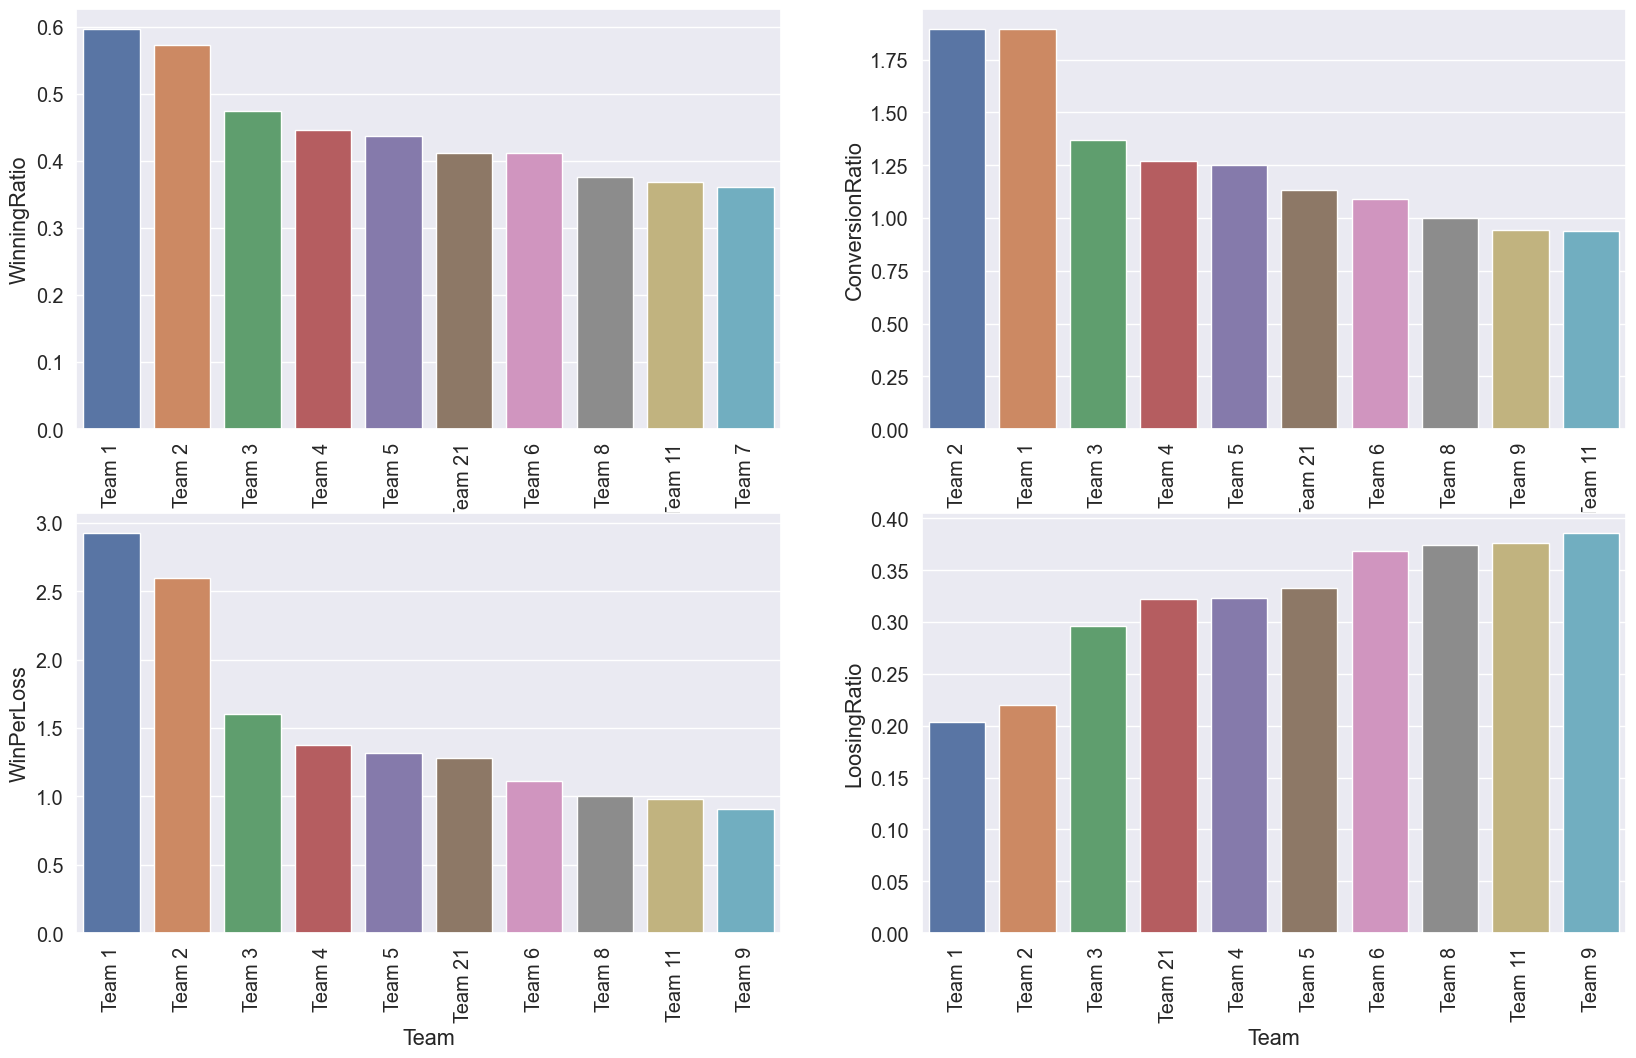

In [42]:
plt.figure(figsize=(20,12))

# The most WinningRatio - top 10
plt.subplot(2,2,1)
bb = basketball[['Team','WinningRatio']].sort_values(by="WinningRatio", ascending=False).where(lambda x: x["WinningRatio"] > 0)
sns.barplot(bb.head(10), x='Team', y='WinningRatio')
plt.xticks(rotation=90)

# The most ConversionRatio - top 10
plt.subplot(2,2,2)
bb = basketball[['Team','ConversionRatio']].sort_values(by="ConversionRatio", ascending=False).where(lambda x: x["ConversionRatio"] > 0)
sns.barplot(bb.head(10), x='Team', y='ConversionRatio')
plt.xticks(rotation=90)

# The most WinPerLoss - top 10
plt.subplot(2,2,3)
bb = basketball[['Team','WinPerLoss']].sort_values(by="WinPerLoss", ascending=False).where(lambda x: x["WinPerLoss"] > 0)
sns.barplot(bb.head(10), x='Team', y='WinPerLoss')
plt.xticks(rotation=90)

# The most LosingRatio - ascending - bottom 10 (meanin least losing ratio)
plt.subplot(2,2,4)
bb = basketball[['Team','LoosingRatio']].sort_values(by="LoosingRatio", ascending=True).where(lambda x: x["LoosingRatio"] > 0)
sns.barplot(bb.head(10), x='Team', y='LoosingRatio')
plt.xticks(rotation=90)


plt.show()

**Observations**
- All attributes seems to be slightly right skewed except for ***TournamentChampion*** and ***Runner-up***.
- **Team 1**, **Team 2** and **Team 5** played the most tournament matches but Team 1 and Team 2 happens to be the highest average scorrer.
- **Team 3** despite of played less matches, have kept their position up in the leaderboard in compared to Team 4 and Team 5
- **Team 1** seems to be a team with consistent performance.
- **Team 2** also very consistent performer.



#### Bivariate Analysis - Relationship between various features

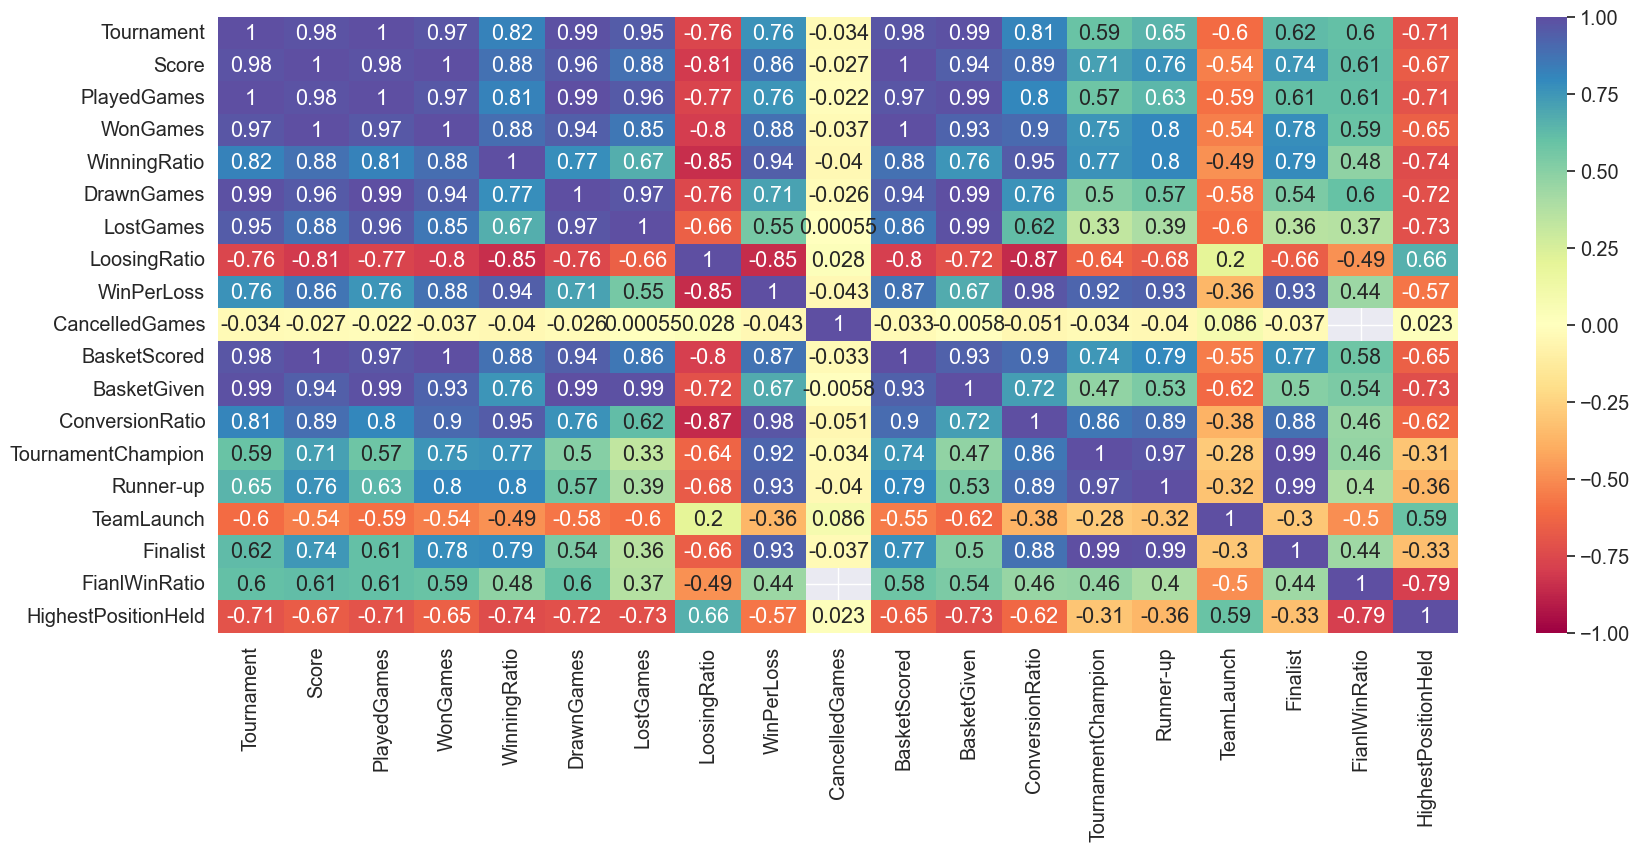

In [43]:
#Let's do a heatmap analysis
plt.figure(figsize=(20,8))
sns.heatmap(basketball.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**
* Tournament Champion shows a high correlation with Winning Ration, Basket Scored and Conversion Ration
* Tournament Champion has a negative correlation with Team Launch - so older terams are better
* Other correlations are as expected

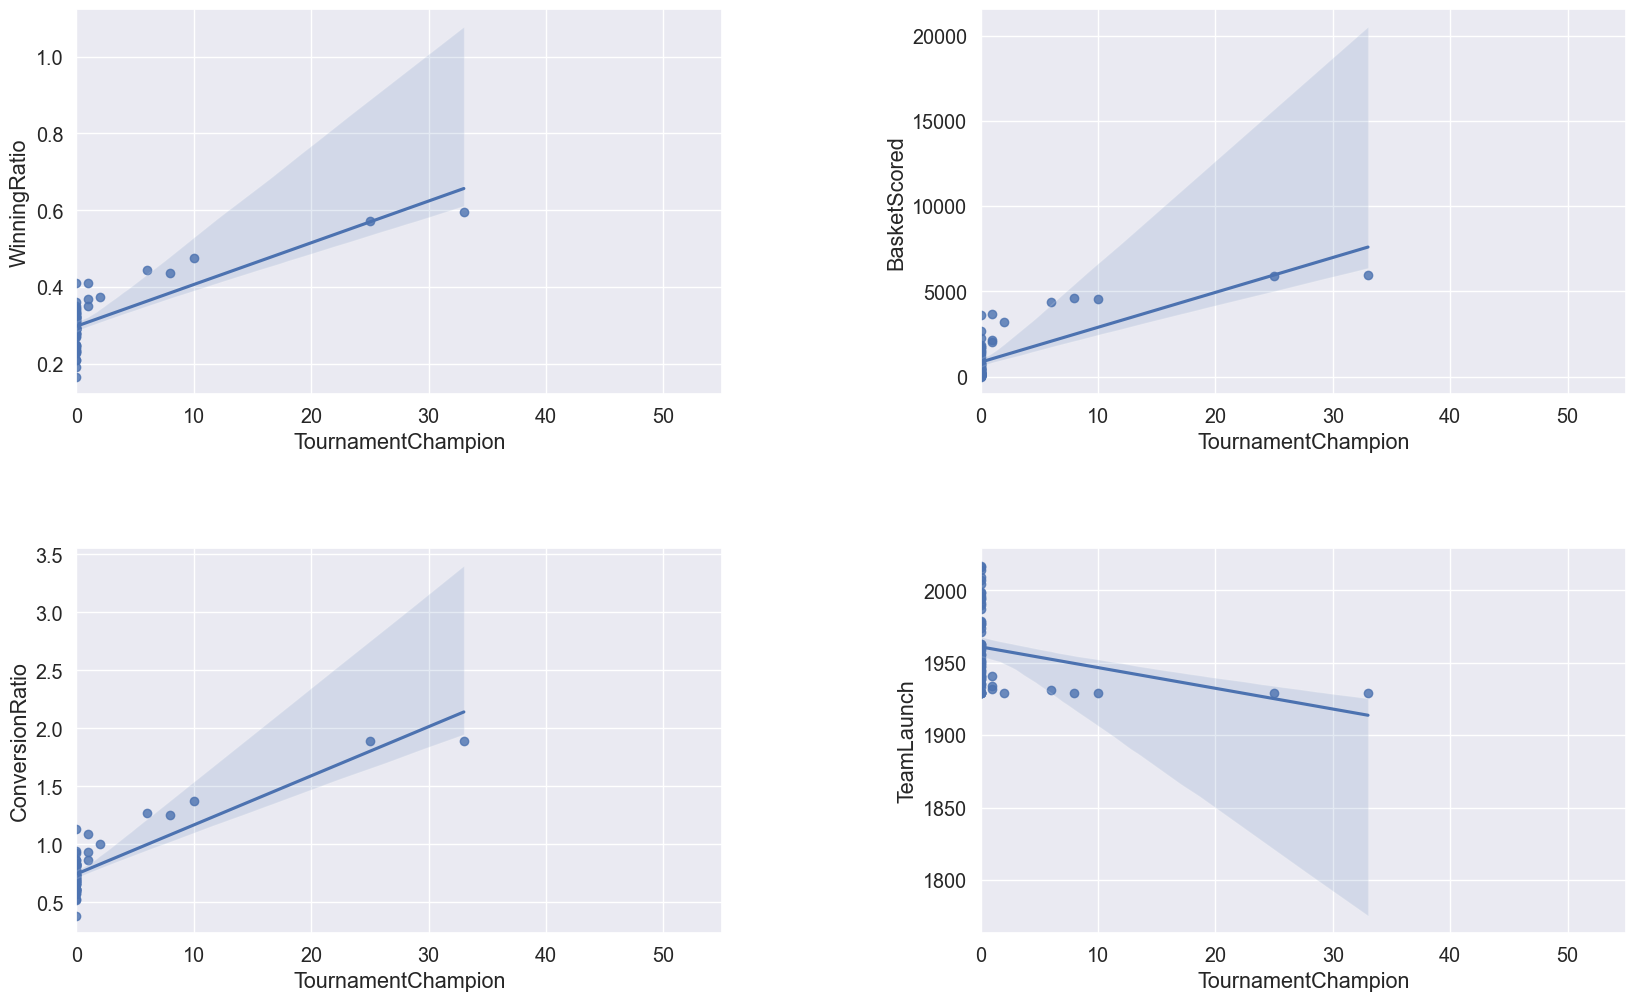

In [44]:
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# The relationship between Champion and winning ratio
ax = fig.add_subplot(2, 2, 1)
sns.regplot(data=basketball,x='TournamentChampion',y='WinningRatio',ax=ax)
plt.xlim(0,55)

# The relationship between Champion and Basket Scored
ax = fig.add_subplot(2, 2, 2)
sns.regplot(data=basketball,x='TournamentChampion',y='BasketScored',ax=ax)
plt.xlim(0,55)

# The relationship between Champion and Basket Scored
ax = fig.add_subplot(2, 2, 3)
sns.regplot(data=basketball,x='TournamentChampion',y='ConversionRatio',ax=ax)
plt.xlim(0,55)

# The relationship between Champion and Team Launch
ax = fig.add_subplot(2, 2, 4)
sns.regplot(data=basketball,x='TournamentChampion',y='TeamLaunch',ax=ax)
plt.xlim(0,55)
plt.show()

#### Multivariate Analysis - Pairwise relatioship of all features

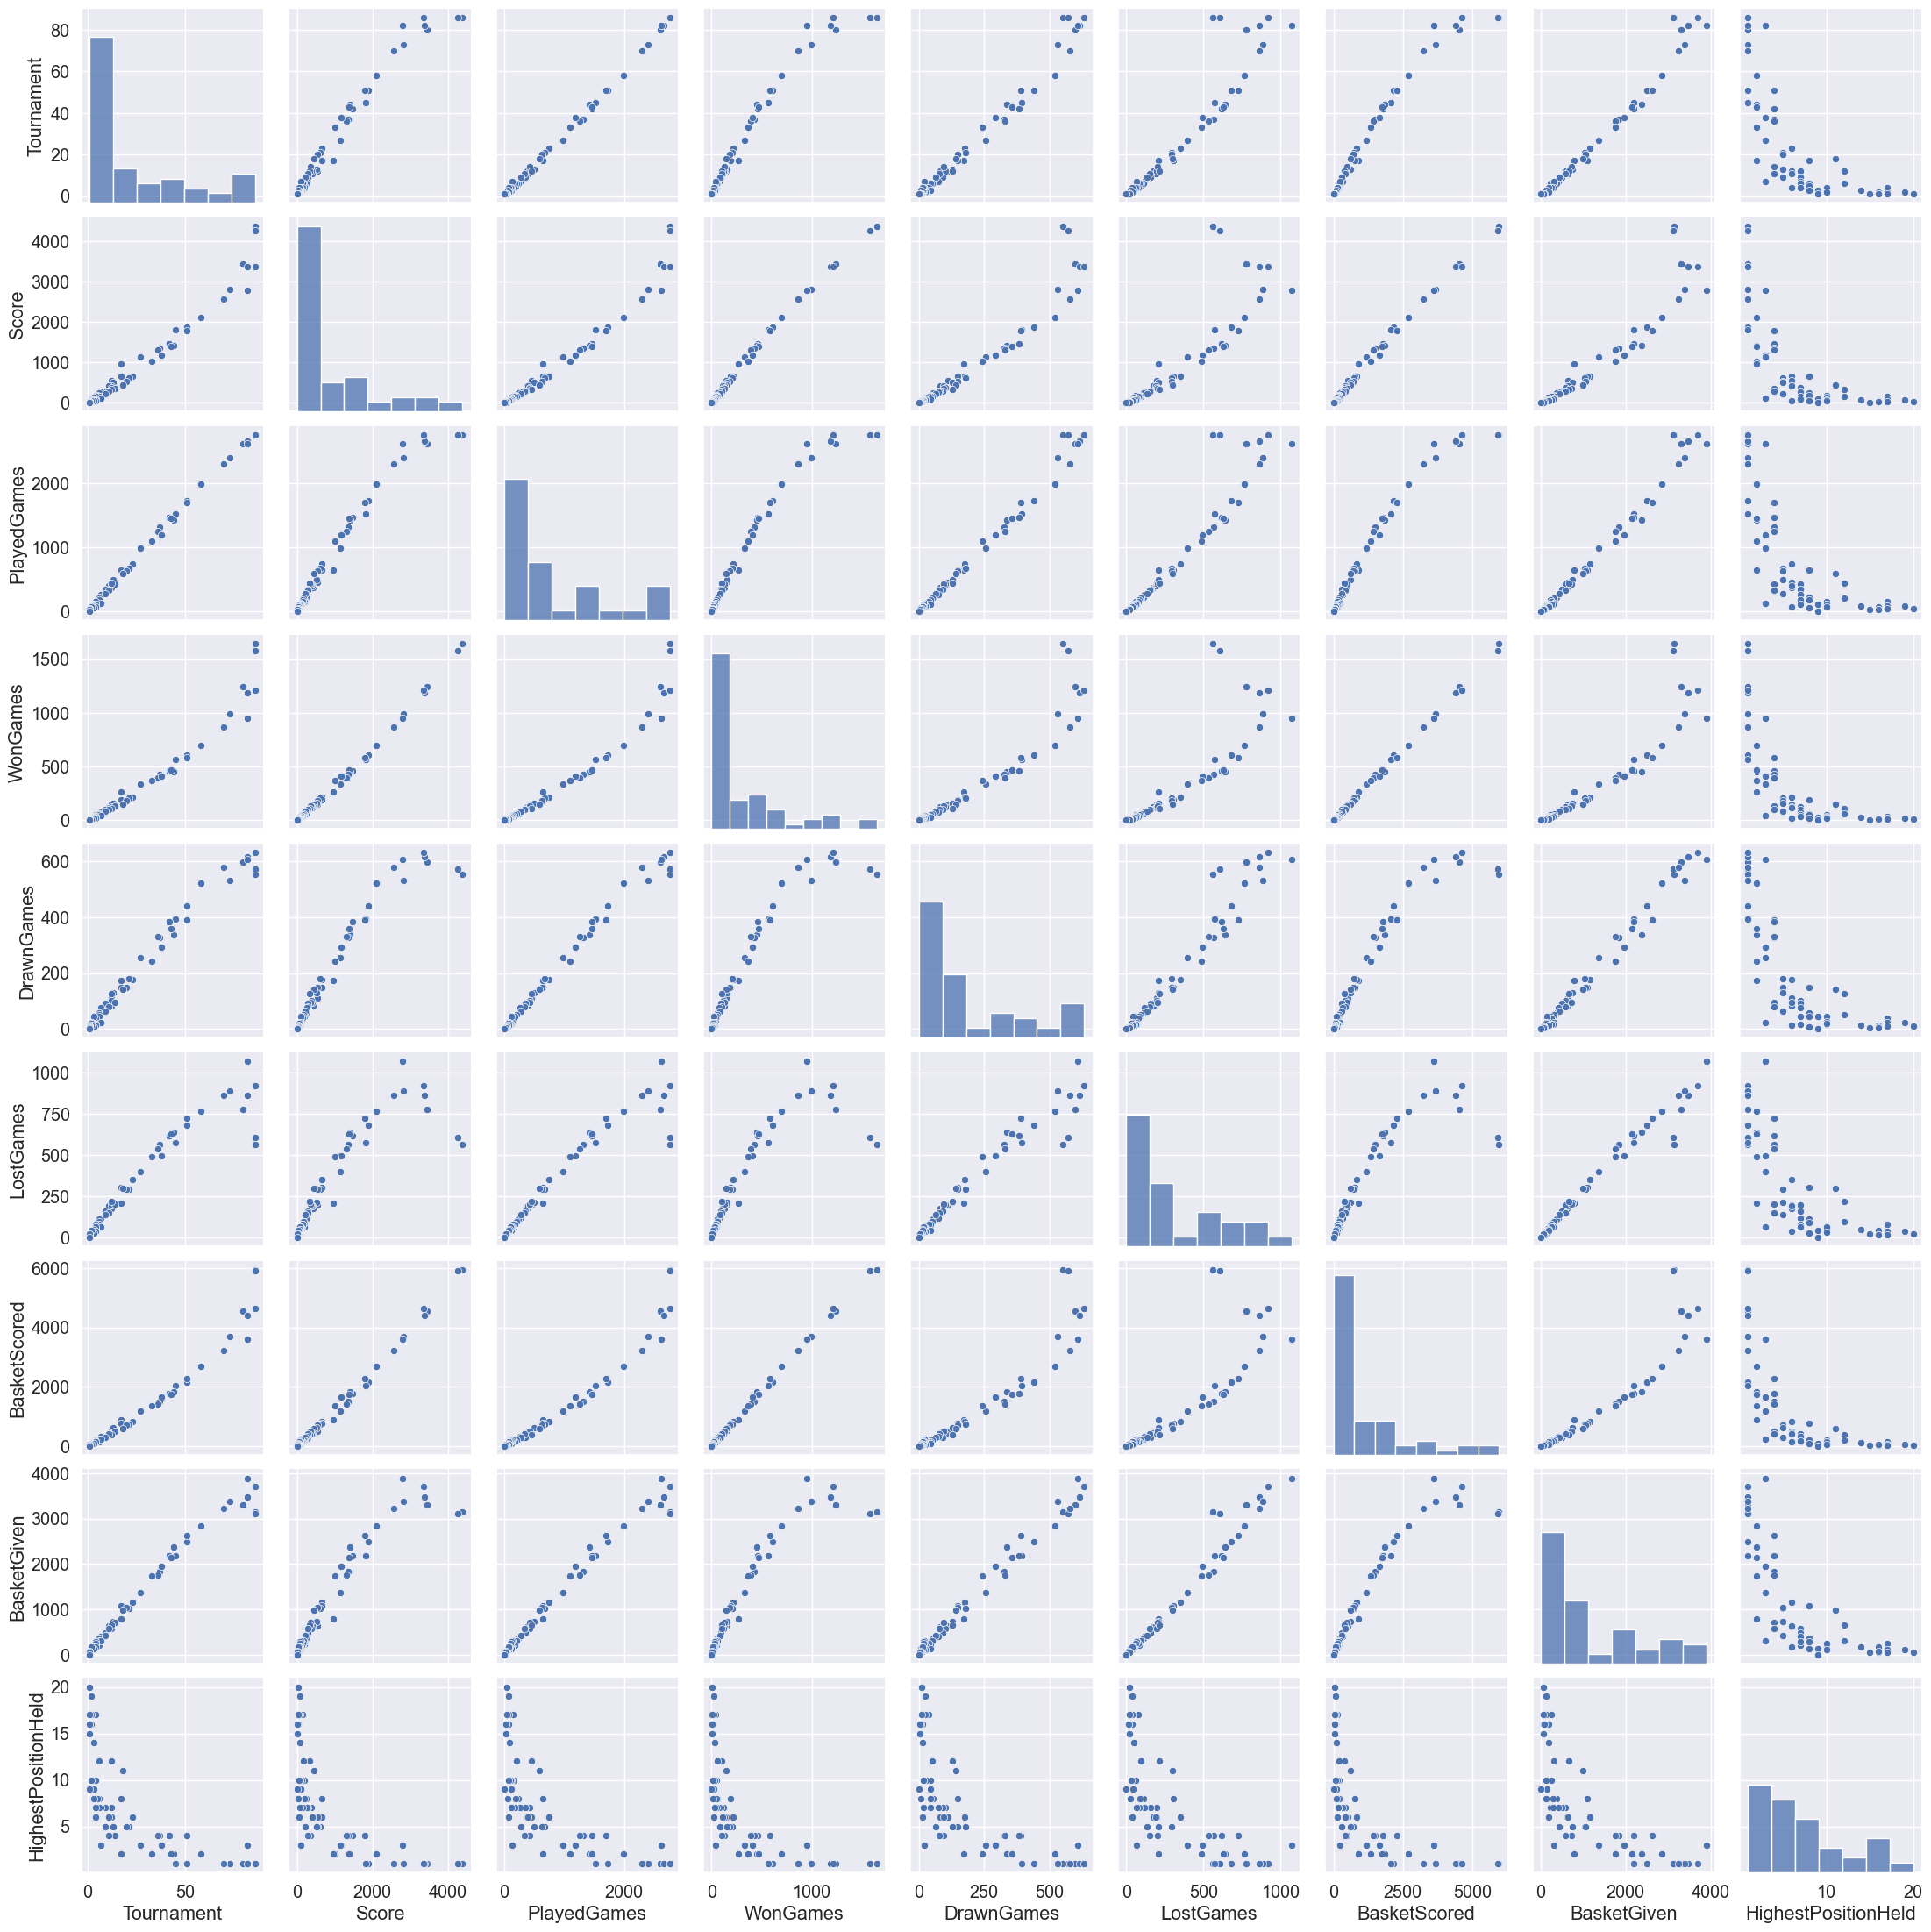

In [45]:
# Pairwise relationship
sns.pairplot(basketball[attrs])
plt.show()

**Observations**
- Attribiutes are lineraly related as shown in the Pairgrid except for TeamLaunch and highestPositionHeld.

### Conclusion

* Teams 1 and 2 are obviously best bet.
* Team 3, 4 and 5 are very close competitor
* Team 21 is a dark horse, launched in 1998, but already held highest position 2 and 1 time finalist(runner-up)


### Suggessions

* Collect data about consecutive wins and consecutively stayed on position 1
* Some of the data items were missing with '-', collect as many data is possible
* Team launch data points are right skewed, so we have more older team than newer teams. So, collect data uniformly for team launched from each era.
* Team trends are not understood from the data. Hence, we should see the what is the recent performances of team. The teams which won more, then are very old team, they may won all their games 20 years ago, but recently they are strugling. these insight is not present. So, a last 5 year (for example) stats on their performance will give us better understanding of recent form of each team.

# PART C - 15 Marks

- **DOMAIN:** Startup ecosystem  
- **CONTEXT:** Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the                  business related to technology news, analysis of emerging trends and profiling of new tech businesses and                      products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup                          Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience,                      present in person and online.
- **DATA DESCRIPTION:** CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company.
- **DATA DICTIONARY:**
     1. **Startup**: Name of the company
     2. **Product**: Actual product
     3. **Funding**: Funds raised by the company in USD
     4. **Event**: The event the company participated in
     5. **Result**: Described by Contestant, Finalist, Audience choice, Winner or Runner up
     6. **OperatingState**: Current status of the company, Operating ,Closed, Acquired or IPO
        <div style="color:#D3D3D3">Dataset has been downloaded from the internet. All the credit for the dataset goes to the original creator of the data. </div>
- **PROJECT OBJECTIVE:** Analyse the data of the various companies from the given dataset and perform the tasks that are                                specified in the below steps. Draw insights from the various attributes that are present in the                                dataset, plot distributions, state hypotheses and draw conclusions from the dataset.
- **STEPS AND TASK [15 Marks]:**
     1. Read the CSV file.
     2. Data Exploration: [1 Mark]
        <ol type="a">
         <li>Check the datatypes of each attribute.</li>
         <li>Check for null values in the attributes.</li>
        </ol>
     3. Data preprocessing & visualisation: [4 Marks]
        <ol type="a">
         <li> Drop the null values. [1 Mark]</li>
         <li> Convert the ‘Funding’ features to a numerical value.</li>
             <div style="color:#D3D3D3">
              (Execute below code)<br>
              df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else                         (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
             </div>
         <li> Plot box plot for funds in million. [1 Mark]</li>
         <li> Check the number of outliers greater than the upper fence. [1 Mark]</li>
         <li> Check frequency of the OperatingState features classes. [1 Mark]</li>
        </ol>
     4. Statistical Analysis: [10 Marks]
        <ol type="a">
         <li> Is there any significant difference between Funds raised by companies that are still operating vs companies that               closed down? [1 Mark]</li>
         <li> Write the null hypothesis and alternative hypothesis. [1 Mark]</li>
         <li> Test for significance and conclusion [1 Mark]</li>
         <li> Make a copy of the original data frame. [1 Mark]</li>
         <li> Check frequency distribution of Result variables. [1 Mark]</li>
         <li> Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1  Mark]</li>
         <li> Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]</li>
         <li> Test for significance and conclusion [1 Mark]</li>
         <li> Select only the Event that has ‘disrupt’ keyword from 2013 onwards. [1 Mark]</li>
        </ol>

In [46]:
#1. Read the CSV file
startup = pd.read_csv('DS-Part3-CompanyX_EU.csv')

### Data Exploration

In [47]:
#2A. Check the datatypes of each attibutes
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


**Observations:**
* There are 6 attributes
* Each of the atrribute of type string

In [48]:
#2B Check for null values in the attributes.
startup.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

**Observations:**
* Out of 662 observations, in 214 rows _Funding_ column is null

### Data preprocessing & visualisation

In [49]:
# 3A. Drop the null values. [1 Mark]

startup = startup.dropna()
startup.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [50]:
# 3B. Convert the ‘Funding’ features to a numerical value.

startup.loc[:,'Funds_in_million'] = startup['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
startup.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


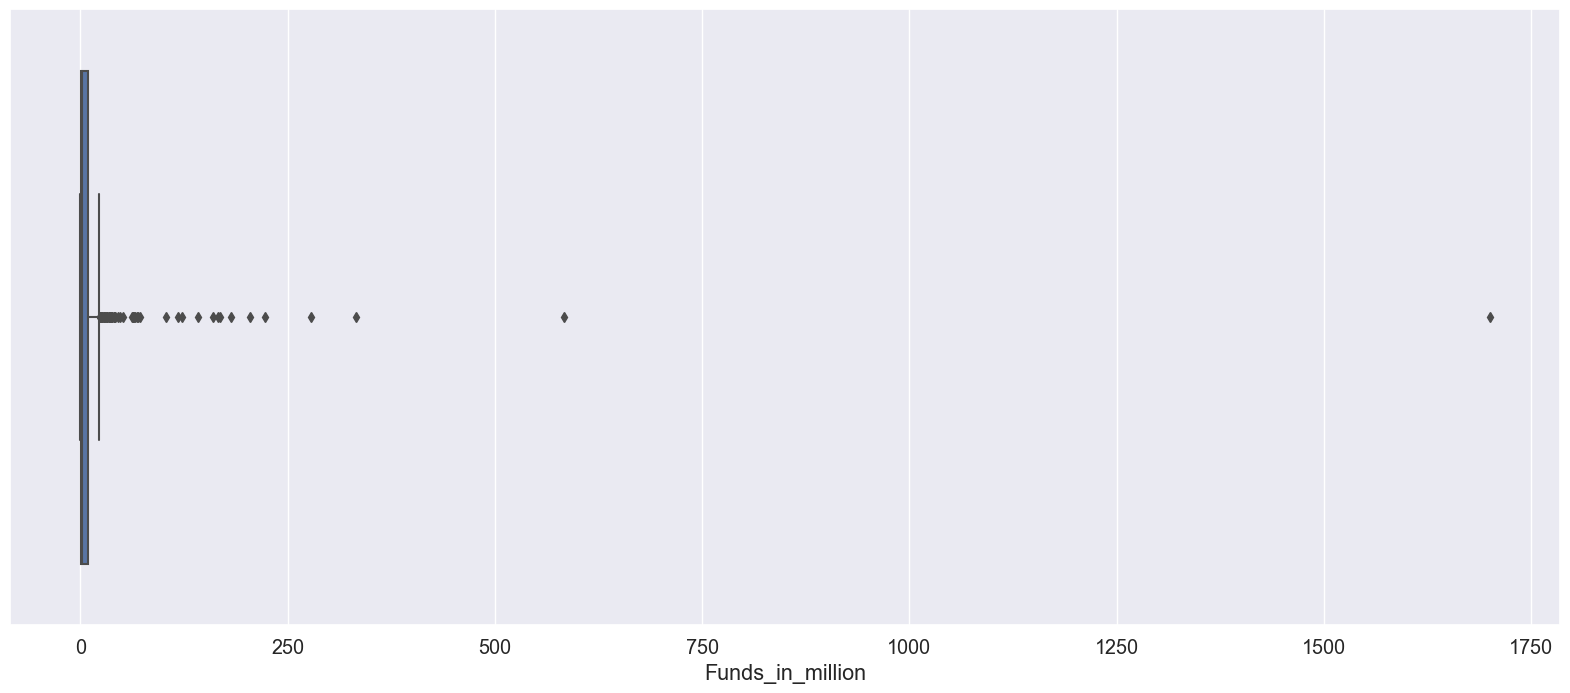

In [51]:
# 3C. Plot box plot for funds in million.

plt.figure(figsize=(20,8))
#With outliers
sns.boxplot(x="Funds_in_million", data = startup);

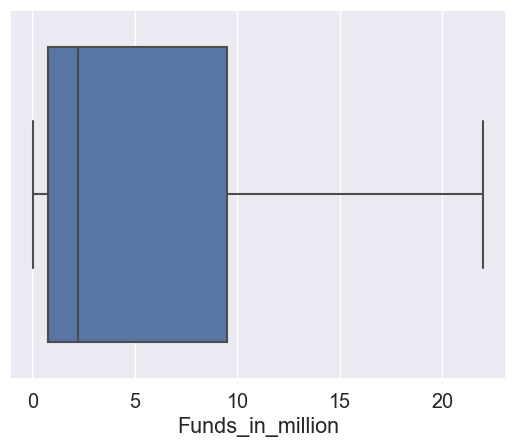

In [52]:
#boxblot without outliers
sns.boxplot(x="Funds_in_million", data = startup, showfliers=False);

In [53]:
# 3D. Check the number of outliers greater than the upper fence.

#Code to find outliers
funds_in_million=startup["Funds_in_million"]

#Quarterile 1
q1=funds_in_million.quantile(0.25)

#Quarterile 3
q3=funds_in_million.quantile(0.75)

#IQR
IQR=q3-q1

#outliers greater than upper fence
outliers_upper_fence = funds_in_million[funds_in_million>(q3+1.5*IQR)]

print("Number of outliers greater than the upper fence : %d" % outliers_upper_fence.shape)

Number of outliers greater than the upper fence : 60


In [54]:
# 3E. Check frequency of the OperatingState features classes.

startup['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

### Statistical Analysis

**4A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?**

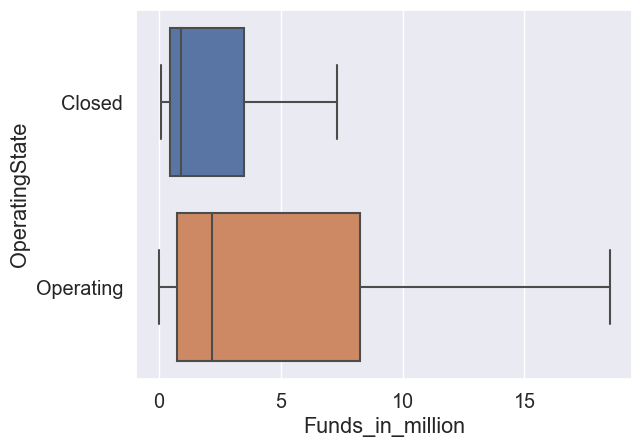

In [55]:
operating_and_closed_startups=startup[(startup['OperatingState'] == 'Operating') | (startup['OperatingState'] == 'Closed')]
sns.boxplot(data=operating_and_closed_startups, x='Funds_in_million', y='OperatingState', showfliers=False);

**Observation:** Prima facie, looks like there is a significant difference in funding for operating and closed down companies.

**4B. Write the null hypothesis and alternative hypothesis.**

**Null Hypothesis :** The sample mean for funding of operating startups is not significantly different than sample mean for funding of closed down startups.

**Alternative Hypothesis :** The sample mean for funding of operating startups is significantly different than sample mean for funding of closed down startups. (Two sided - its either larger than or smaller than)

Let $\mu_1$ and $\mu_2$ be the means of funding in million for startup types Operationg and Closed respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis

>$H_a: \mu_1 \neq \mu_2$ 

**4C. Test for significance and conclusion** 

OperatingState
Closed        3.258170
Operating    19.062186
Name: Funds_in_million, dtype: float64


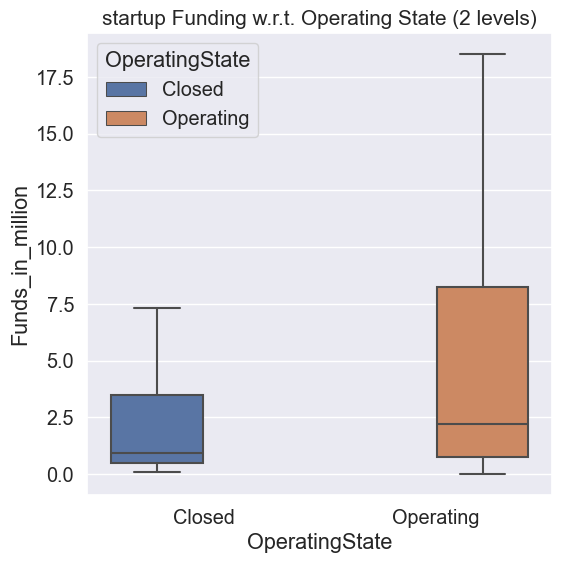

In [56]:
# mean of funding for startups

print(operating_and_closed_startups.groupby("OperatingState")["Funds_in_million"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "OperatingState", y = 'Funds_in_million' , data = operating_and_closed_startups, hue = 'OperatingState', showfliers=False)
a.set_title("startup Funding w.r.t. Operating State (2 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Funding follows a normal distribution

against the alternative hypothesis

>$H_a:$ Funding does not follow a normal distribution

In [57]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(operating_and_closed_startups['Funds_in_million']) 
print('The p-value is', p_value)

The p-value is 3.365469655020548e-38


Since p-value of the test is very low, we reject the null hypothesis that the response follows the normal distribution.
But this can be due to large number of outliers. Lets create a dataset and remove the outliers.


In [58]:
data_no_outliers = operating_and_closed_startups[(operating_and_closed_startups['Funds_in_million']<(q3+1.5*IQR)) & (operating_and_closed_startups['Funds_in_million']>(q1+1.5*IQR))]

w, p_value = stats.shapiro(data_no_outliers['Funds_in_million']) 
print('The p-value is', p_value)


The p-value is 0.3264749050140381


Now the data looks like more normally distributed as p-value is large.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [59]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( operating_and_closed_startups['Funds_in_million'][operating_and_closed_startups['OperatingState']=="Operating"], 
                                   operating_and_closed_startups['Funds_in_million'][operating_and_closed_startups['OperatingState']=="Closed"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.26610865886734053


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test for data withing IQR.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Let's find the p-value

In [60]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(operating_and_closed_startups.loc[operating_and_closed_startups['OperatingState'] == 'Operating', 'Funds_in_million'],
                              operating_and_closed_startups.loc[operating_and_closed_startups['OperatingState'] == 'Closed', 'Funds_in_million'])
print('The p-value is ' + str(p_value))

The p-value is 0.2557270188562704


### Conclusion
As the p-value is more than than 5% significance level for two tailed test (0.025) , we fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that the sample mean for funding of operating startups is significantly different than sample mean for funding of closed down startups

**4D. Make a copy of the original data frame.**

In [61]:
startup_copied = startup.copy(deep=True)

**4E. Check frequency distribution of Result variables.**

In [62]:
startup_copied['Result'].value_counts()

Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64

**4F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating**

In [63]:
total_winners = startup_copied[startup_copied['Result'] == 'Winner']
total_contestants = startup_copied[startup_copied['Result'] == 'Contestant']
winners_operating = total_winners[total_winners['OperatingState'] == 'Operating']
contestant_operating = total_contestants[total_contestants['OperatingState'] == 'Operating']

pct_winner = (winners_operating.shape[0] / total_winners.shape[0]) * 100
pct_contestant = (contestant_operating.shape[0] / total_contestants.shape[0]) *100

print("Percentage of winners that are still operating : %2.2f" % pct_winner, "%" )
print("Percentage of contestants that are still operating : %2.2f" % pct_contestant, "%" )

Percentage of winners that are still operating : 72.00 %
Percentage of contestants that are still operating : 68.59 %


**4G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:**

**Null Hypothesis ($H_0$) :** : Company still operating is dependent on company is winning the competetion

**Alternative Hypothesis ($H_a$) :** Company still operating is independent of company is winning the competetion


**4H. Test for significance and conclusion**

In [64]:
#first create the proportion dataframe
df = pd.DataFrame({'Operating': [winners_operating.shape[0], contestant_operating.shape[0]], 'Not-Operating': [total_winners.shape[0]-winners_operating.shape[0], total_contestants.shape[0]-contestant_operating.shape[0]]}, index = ['Winners', 'Contestant'])
df

,Operating,Not-Operating
Winners,18,7
Contestant,214,98


We select α= 0.05 as per 95% Confidence Level requirement in the question.
This is a Chi-sq Test where categorical data has been reported in raw frequencies.

In [65]:
#Calculate the p - value and test statistic
from   scipy.stats        import    chi2_contingency
chi2, pval, dof, exp_freq = chi2_contingency(df, correction = False)
pval

0.7231510556194243

Since the pvalue is > 0.05, therefore, at 95% confidence we fail to reject the null hypothesis which implies that companies continuing the operation is dependent on company is a winner of the competetion.

**4I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards.**

In [66]:
#list all rows which contains 'disrupt' (case-insensitive) word in Even column
filter_rows = startup_copied[startup_copied['Event'].str.contains('disrupt',case=False)]
filter_rows.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,1.00
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,0.75


In [67]:
#print the unique Events columns
filter_rows['Event'].unique()

array(['Disrupt NYC 2013', 'Disrupt NY 2016', 'Disrupt Beijing 2011',
       'Disrupt SF 2015', 'Disrupt London 2016', 'Disrupt NYC 2014',
       'Disrupt SF 2012', 'Disrupt SF 2011', 'Disrupt NYC 2010',
       'Disrupt NYC 2012', 'Disrupt EU 2013', 'Disrupt NYC 2011',
       'Disrupt SF 2010', 'Disrupt SF 2014', 'Disrupt SF 2013',
       'Disrupt NY 2015', 'Disrupt SF 2016', 'Disrupt London 2015',
       'Disrupt EU 2014'], dtype=object)